In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from sklearn.metrics import silhouette_score


In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('Country-data.csv')

In [4]:
df.shape

(167, 10)

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df_dict = pd.read_csv('data-dictionary.csv')

In [7]:
df_dict.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
# no duplicates
df['country'].nunique()

167

In [ ]:
################# EDA

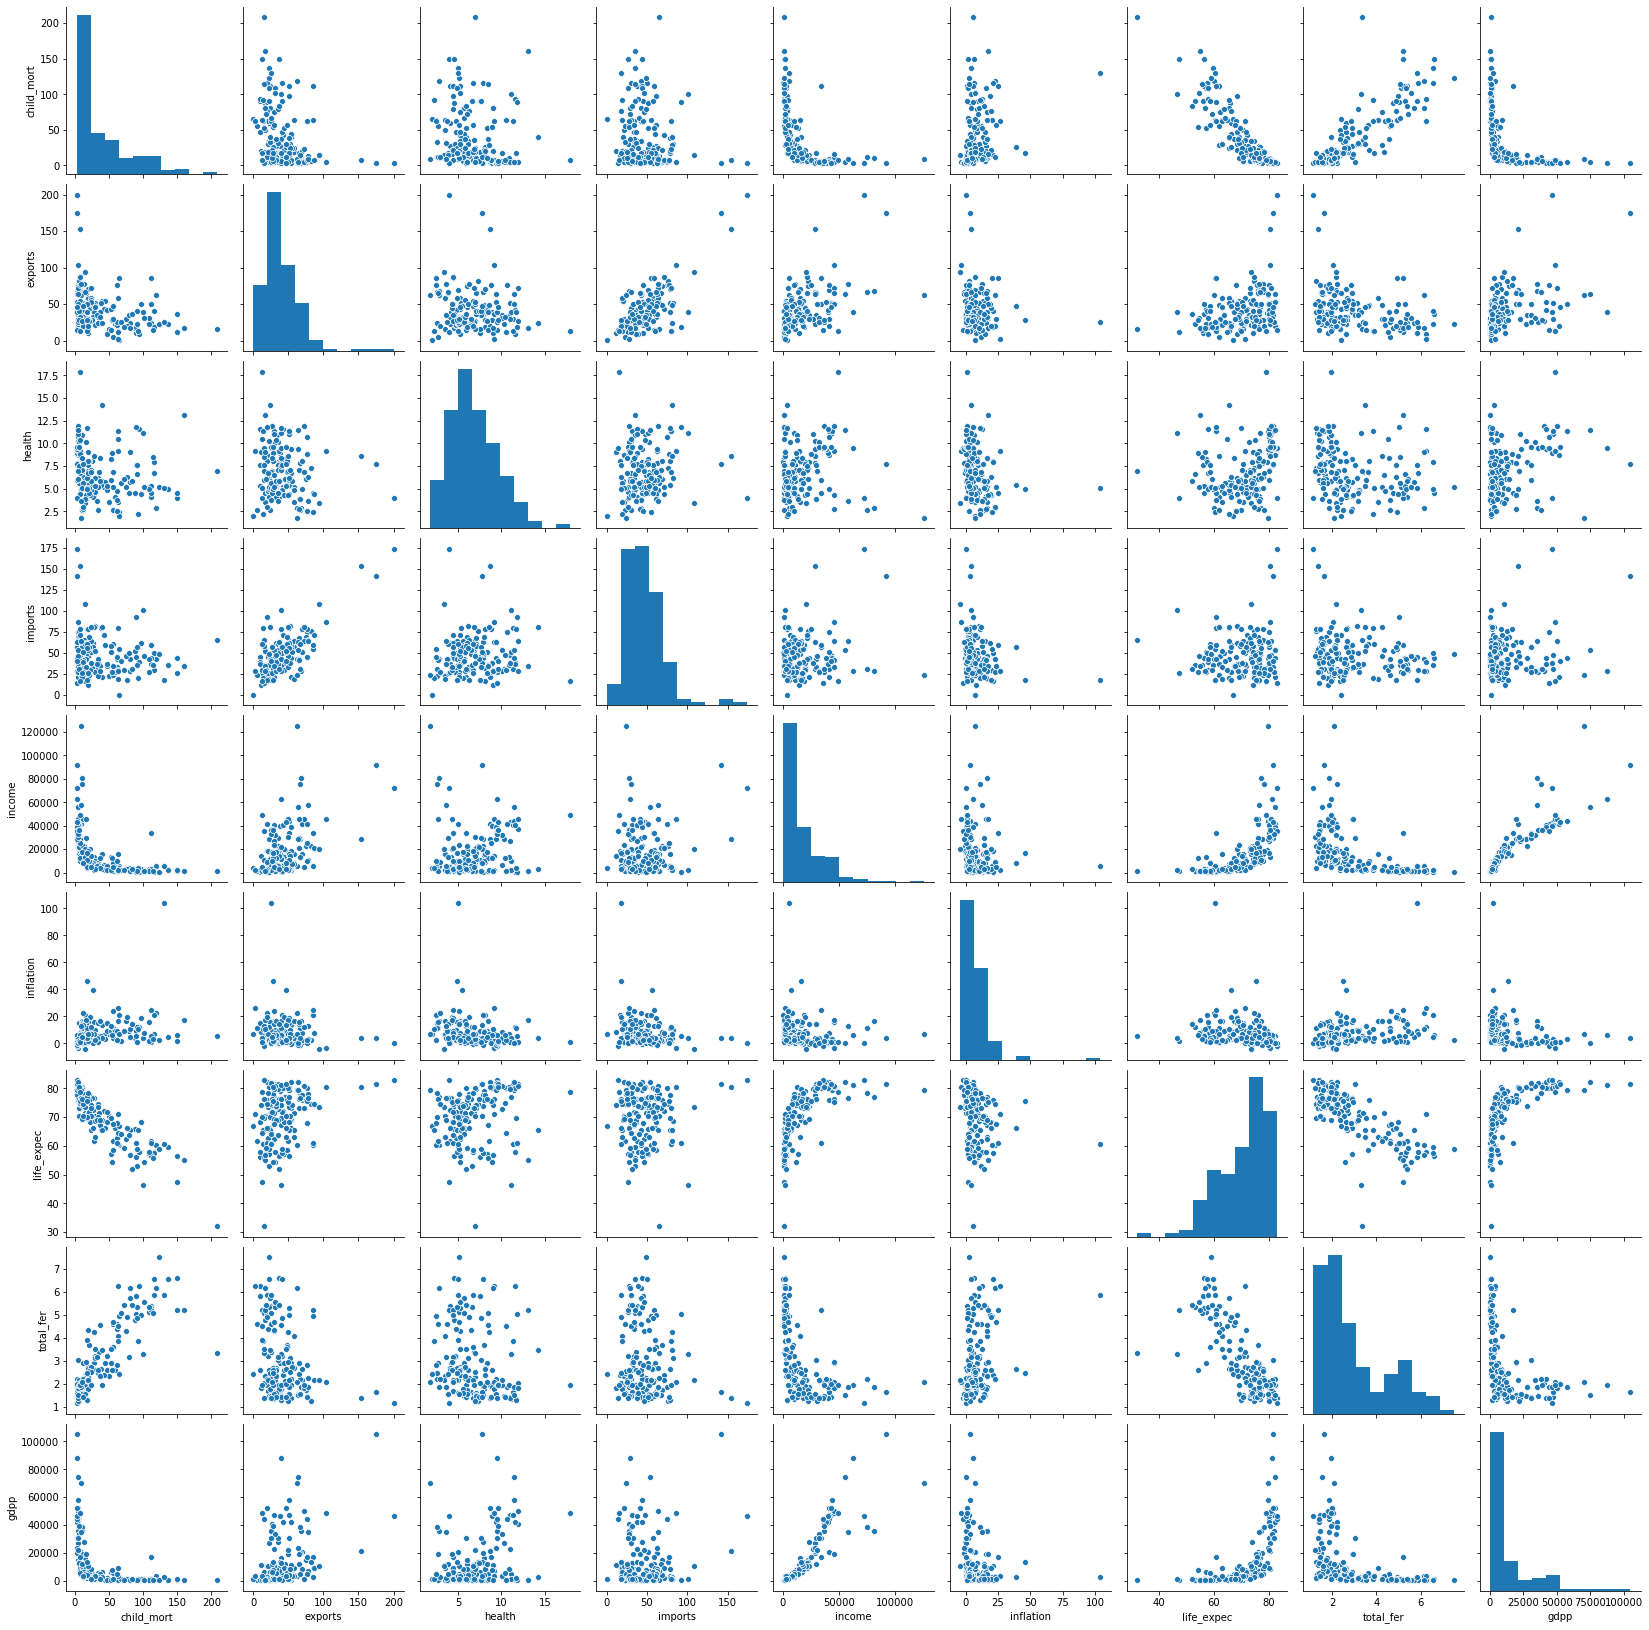

In [7]:
sns.pairplot(df)

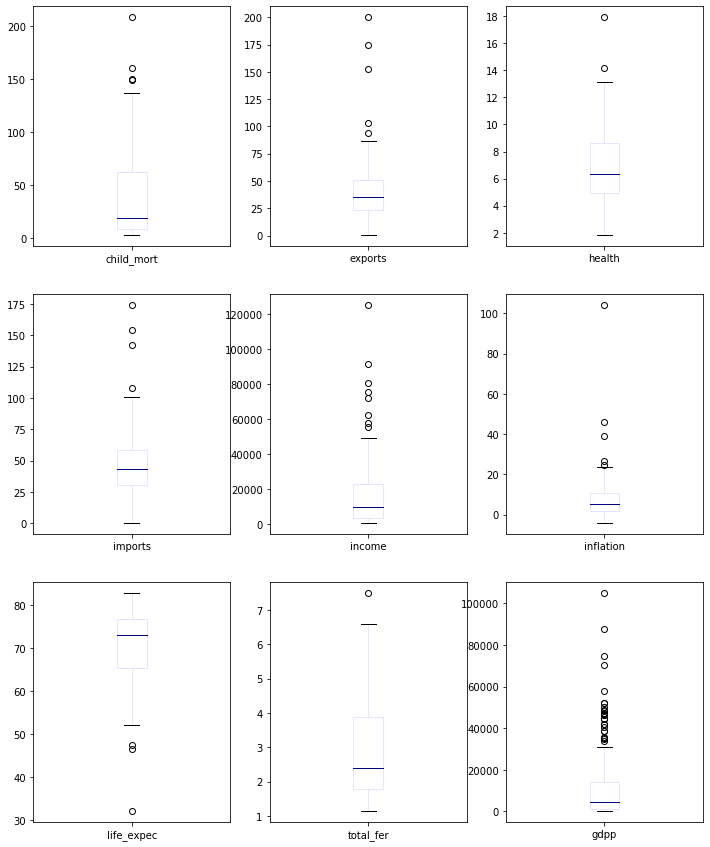

In [13]:
# boxplots
my_cmap = sns.light_palette("Navy", as_cmap=True)
df.plot(kind='box',subplots=True, layout=(3,3),figsize=(12,15), colormap=my_cmap)
plt.show()

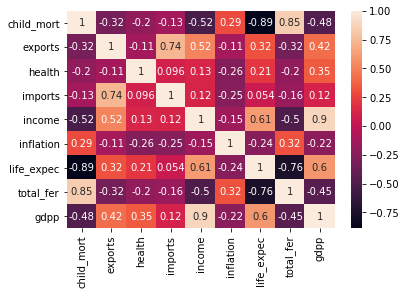

In [14]:
# Correlation Matrix
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)

In [ ]:
###### STANDARD SCALER

In [11]:
df2 = df.drop(['country'], axis=1)

In [12]:
# Scale data
sc = StandardScaler()
scaled = sc.fit_transform(df2)
scaled_df = pd.DataFrame(scaled, columns=df2.columns)
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [ ]:
# KMEANS

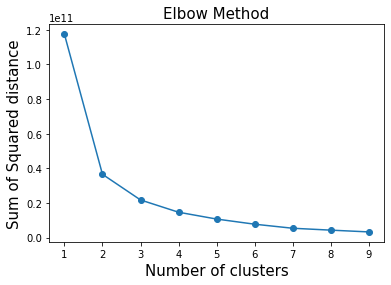

In [13]:
# Elbow method on df2
a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df2)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [15]:
# kmeans 3 clusters
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [16]:
# number of countries per cluster
pd.Series(kmeans.labels_).value_counts()

1    84
0    47
2    36
dtype: int64

In [17]:
clusters_df = pd.DataFrame(df)
clusters_df['KMeans_labels'] = kmeans.labels_
clusters_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [18]:
# Silhouette coefficient
metrics.silhouette_score(scaled_df, kmeans.labels_)

0.28329575683463126

In [ ]:
# AFFINITY PROPAGATION

In [19]:
clustering = AffinityPropagation(damping=0.9, preference=-200).fit(scaled_df)
#clustering.labels_
clusters_df['aff_labels'] = clustering.labels_
clusters_df['aff_labels'].value_counts()

2    82
0    51
1    34
Name: aff_labels, dtype: int64

In [20]:
metrics.silhouette_score(scaled_df, clusters_df['aff_labels'])

0.2743598998217804

In [ ]:
# GAUSSIAN MIXTURE MODELS

In [21]:
gmm = GaussianMixture(n_components=3,
                      covariance_type="diag",
                      max_iter = 1000,
                      random_state=42)

In [22]:
pred = gmm.fit_predict(scaled_df)
clusters_df['gmm_labels'] = pred
clusters_df['gmm_labels'].value_counts()

1    75
0    62
2    30
Name: gmm_labels, dtype: int64

In [23]:
metrics.silhouette_score(scaled_df, clusters_df['gmm_labels'])

0.21477255271795828

In [17]:
clusters_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels,aff_labels,gmm_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,2,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,2,0


In [24]:
# map cluster numbers to have the same correspondence: 
# developed countries=2, developing countries=1, Least developed countries=0
clusters_df['aff_labels'].replace({1: 2, 2: 1}, inplace=True)
clusters_df['gmm_labels'].replace({1: 0, 0: 1}, inplace=True)
clusters_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels,aff_labels,gmm_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1,1,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1,1,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1,1,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1,1,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,2,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,2,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1,1,0


In [ ]:
# T-SNE and bokeh visualization

In [26]:
df_tsne = df.copy(deep=True)

In [27]:
# Dimension reduction with t-SNE
model = TSNE(n_components=2, learning_rate=200, random_state=42)
tsne_features = model.fit_transform(df2)
print(tsne_features[0:5])

[[15.19212   -8.173194 ]
 [ 1.1203487 -2.1199071]
 [-1.3980572 -0.9974683]
 [ 5.8049984 -3.2079625]
 [-6.1782255  3.0046954]]


In [28]:
# Make X, Y columns 
df_tsne['X'] = tsne_features[:,0]
df_tsne['Y'] = tsne_features[:,1]

In [29]:
df_tsne.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels,aff_labels,gmm_labels,X,Y
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,0,15.192120,-8.173194
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1,1,1.120349,-2.119907
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,1,1,-1.398057,-0.997468
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,0,5.804998,-3.207963
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,1,1,-6.178226,3.004695


In [30]:
# Make a source and a scatter plot  
source = ColumnDataSource(df_tsne)
plot = figure(x_axis_label = "t-SNE 1", 
              y_axis_label = "t-SNE 2")
plot.circle(x = 'X', 
    y = 'Y', 
    source = source, 
    size = 10, color = '#0099FF', alpha = .4)

GlyphRenderer(id='1036', ...)

In [31]:
# Create a HoverTool object
hover = HoverTool(tooltips = [('country', '@country'),
                              ('KMeans_labels', '@KMeans_labels'),
                              ('aff_labels', '@aff_labels'),
                              ('gmm_labels', '@gmm_labels'),
                              ('child_mort', '@child_mort'),
                              ('gdpp', '@gdpp')])
plot.add_tools(hover) 

In [33]:
# Plot the graph.
show(plot)

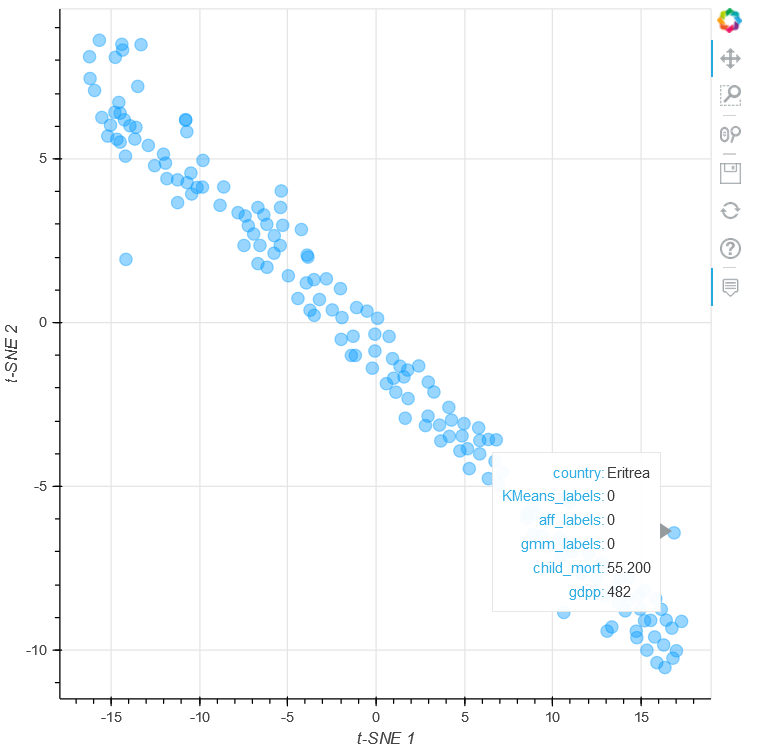

In [ ]:
# As expected, developed countries are located at the upper left part, least developed countries at the right bottom 
# and developing countries in the middle.

In [46]:
# MAPS VISUALIZATION
# The maps show the result of the previous analysis. Colours correspond to KMeans results, 
# hover over the countries to see the outcome of the two other approaches.

In [25]:
clusters_df['KMeans_labels'] = clusters_df['KMeans_labels'].astype('category')

In [ ]:
px.choropleth(data_frame=clusters_df, locationmode='country names', locations='country', 
              color=clusters_df['KMeans_labels'], title='Countries by category',
              hover_data=['aff_labels', 'gmm_labels'], color_discrete_map={0:'#DB1C18',1:'#FFFD37',2:'#0099FF'},
              projection='equirectangular')

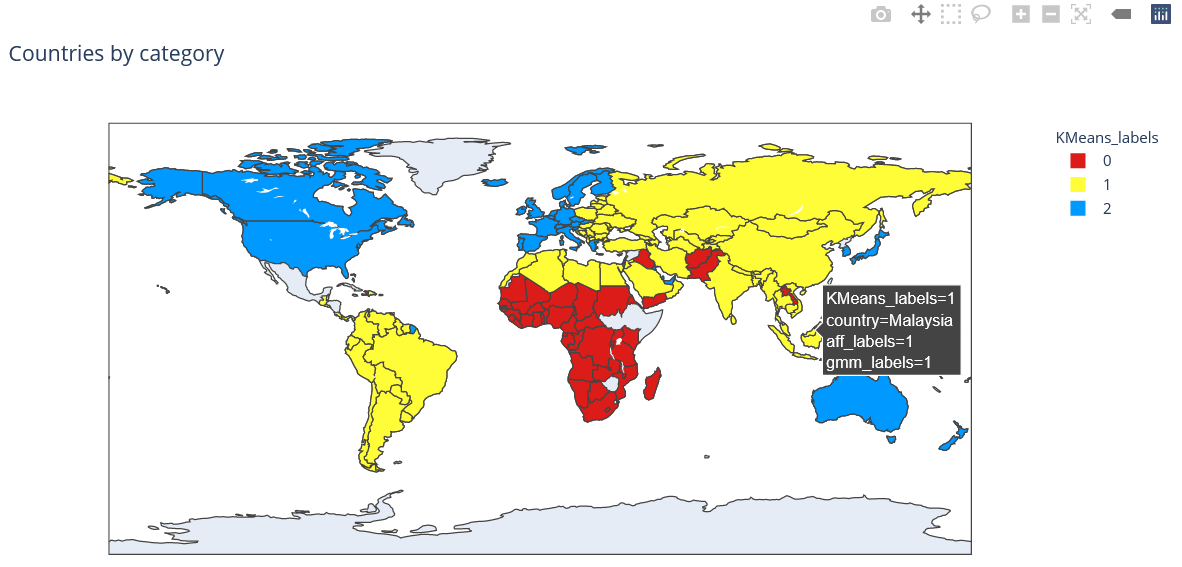

In [ ]:
px.choropleth(data_frame=clusters_df, locationmode='country names', locations='country', 
              color=clusters_df['KMeans_labels'], title='African countries by category',
              color_discrete_map={0:'#DB1C18',1:'#FFFD37',2:'#0099FF'} ,projection='equirectangular', 
              hover_data=['aff_labels', 'gmm_labels'], hover_name='country' ,scope='africa')

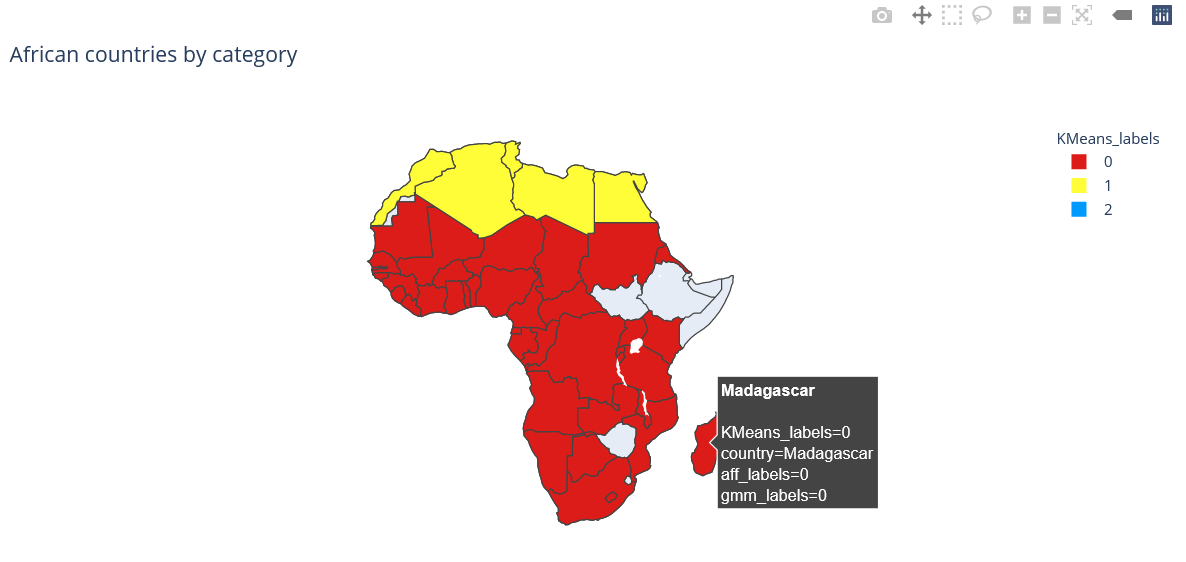

In [ ]:
px.choropleth(data_frame=clusters_df, locationmode='country names', locations='country', 
              color=clusters_df['KMeans_labels'], title='Asian countries by category',
              color_discrete_map={0:'#DB1C18',1:'#FFFD37',2:'#0099FF'} ,projection='equirectangular', 
              hover_data=['aff_labels', 'gmm_labels'], scope='asia')

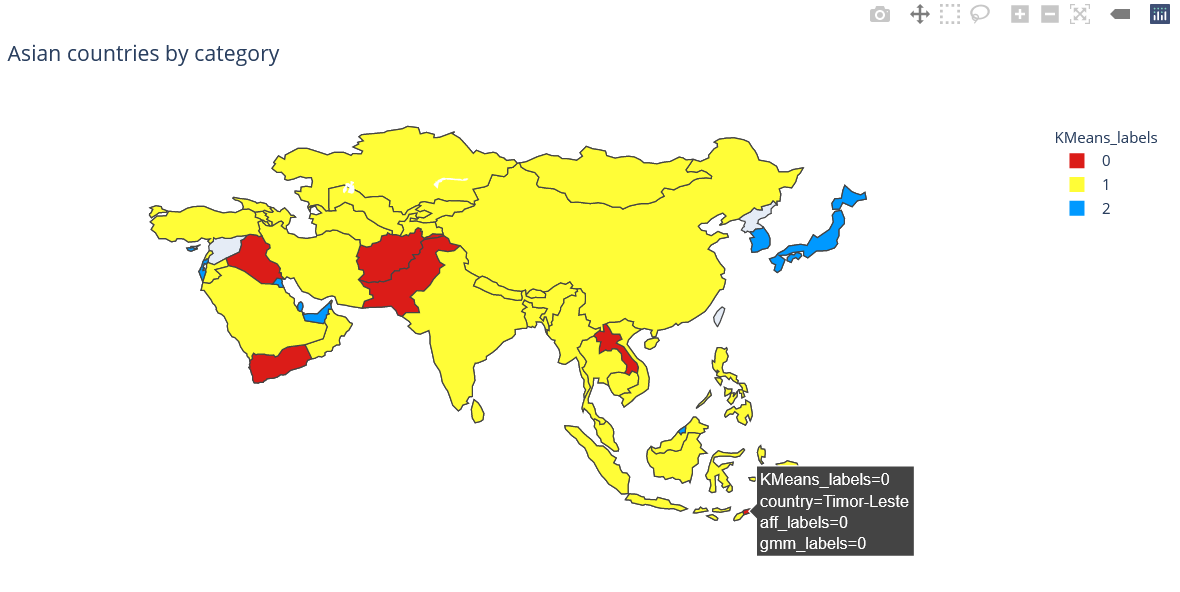